In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Splitting and scaling the data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Creating ANN model
import tensorflow as tf
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense

# Evaluating the model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from tensorflow.keras.callbacks import EarlyStopping
import pickle

# Load the dataset

* The dataset I used is https://www.kaggle.com/harlfoxem/housesalesprediction

In [2]:
df = pd.read_csv('House.csv')
df.shape

(21613, 21)

In [3]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [4]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Feature Description

## 🏠 Feature Description

This dataset includes detailed information about house sales and their characteristics.

### **Feature Details**
- **id:** Unique identifier for each property  
- **date:** Date when the property was sold  
- **price:** Selling price of the house  
- **bedrooms:** Total number of bedrooms  
- **bathrooms:** Number of bathrooms (0.5 = toilet only, no shower)  
- **sqft_living:** Interior living area (sqft)  
- **sqft_lot:** Land size (sqft)  
- **floors:** Number of floors  
- **waterfront:** 1 if the house faces the waterfront, 0 otherwise  
- **view:** View quality rating (0–4)  
- **condition:** Condition rating (1–5)  
- **grade:** Construction & design quality rating (1–13)  
- **sqft_above:** Area above ground (sqft)  
- **sqft_basement:** Basement area (sqft)  
- **yr_built:** Year built  
- **yr_renovated:** Year last renovated  
- **zipcode:** Postal code  
- **lat:** Latitude  
- **long:** Longitude  
- **sqft_living15:** Avg living space of 15 nearby houses  
- **sqft_lot15:** Avg lot size of 15 nearby houses  

### **Feature Types**
- **Categorical:** id, waterfront, zipcode  
- **Continuous:** price, bathrooms, floors, lat, long  
- **Discrete:** date, bedrooms, sqft_living, sqft_lot, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, sqft_living15, sqft_lot15  


# Exploratory Data Analysis

### Lets see first the correlation of independent variables to target variable

In [7]:
num_df = df.drop(columns=['id', 'date', 'zipcode'], errors='ignore').select_dtypes(include=['int64', 'float64'])


In [8]:
corr = num_df.corr()
corr = corr.reindex(corr['price'].sort_values(ascending=False).index)

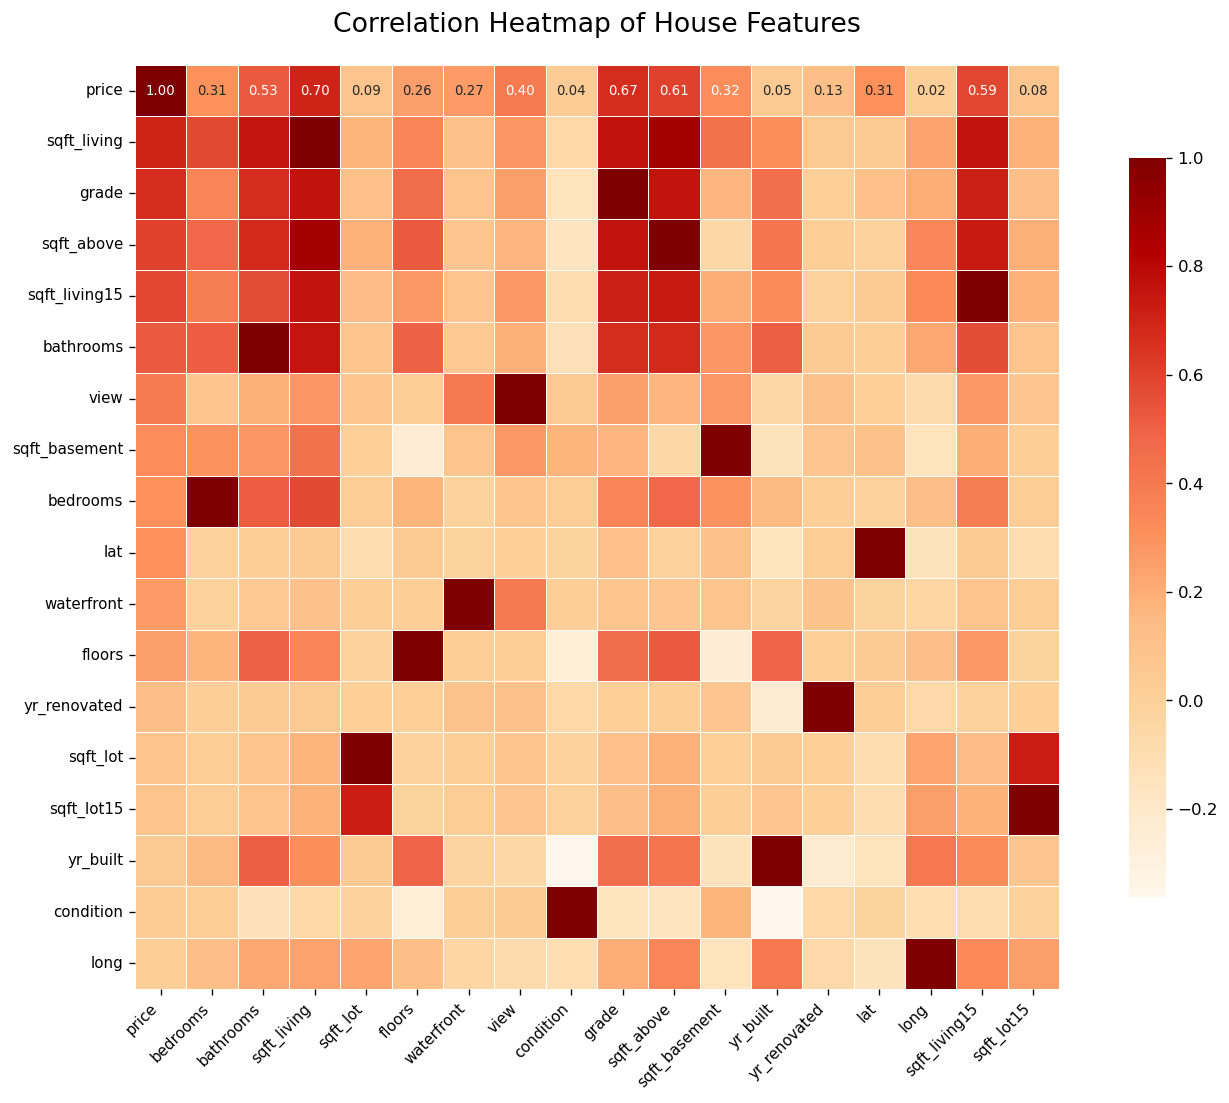

In [9]:
plt.figure(figsize=(15, 10), dpi=120)
sns.heatmap(
    corr,
    annot=True,
    fmt='.2f',
    cmap='OrRd',
    linewidths=0.5,
    square=True,
    cbar_kws={'shrink': 0.8},
    annot_kws={"size": 8}
)
plt.title("Correlation Heatmap of House Features", fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(rotation=0, fontsize=9)
plt.show()


Lets see the features with high correlation to price (independent feature)

## Exploring categorical variables

* House price distribution based on waterfront

### House prices with and without waterfront

C:\Users\91639\AppData\Local\Temp\ipykernel_11692\1758959864.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['waterfront']==0]['price'],color='r',shade=True,label='Without waterfront',ax=ax[0])
C:\Users\91639\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\91639\AppData\Local\Temp\ipykernel_11692\1758959864.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['waterfront']==1]['price'],color='b',shade=True,label='Waterfront',ax=ax[0])
C:\Users\91639\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: us

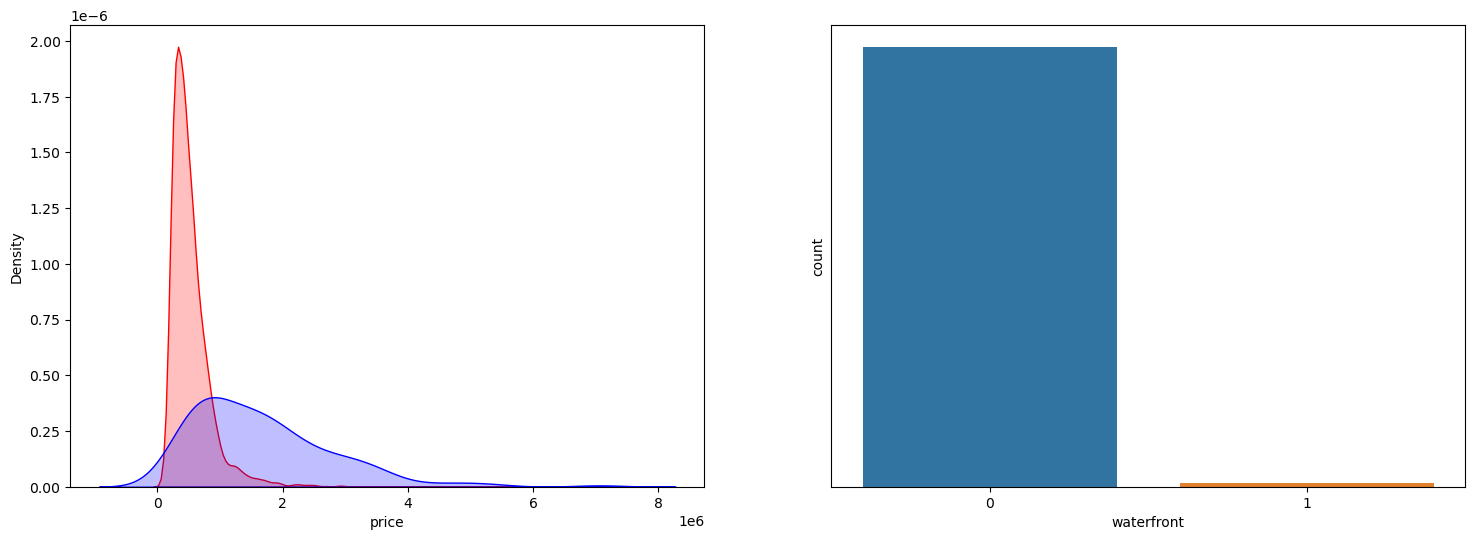

In [10]:
fig,ax = plt.subplots(ncols=2,figsize=(18,6))
sns.kdeplot(df[df['waterfront']==0]['price'],color='r',shade=True,label='Without waterfront',ax=ax[0])
sns.kdeplot(df[df['waterfront']==1]['price'],color='b',shade=True,label='Waterfront',ax=ax[0])
sns.countplot(x='waterfront',data=df,ax=ax[1])
plt.yticks([])
plt.show()

#### Insight

* Houses with waterfront tends to have higher average prices than those who dont have. 
* Prices of houses with waterfront are more spread out.
* Outliers are present in both categories.
* Imbalanced distribution of data between houses with and without waterfront

## Exploring numerical variables

* House price based on number of bedrooms and bathrooms
* House price based on living space and land space (square ft.)
* House price based on the number of floors
* House price based on view and condition
* House price based on grade
* House price based on year built and renovated

### House price based on number of bedrooms and bathrooms

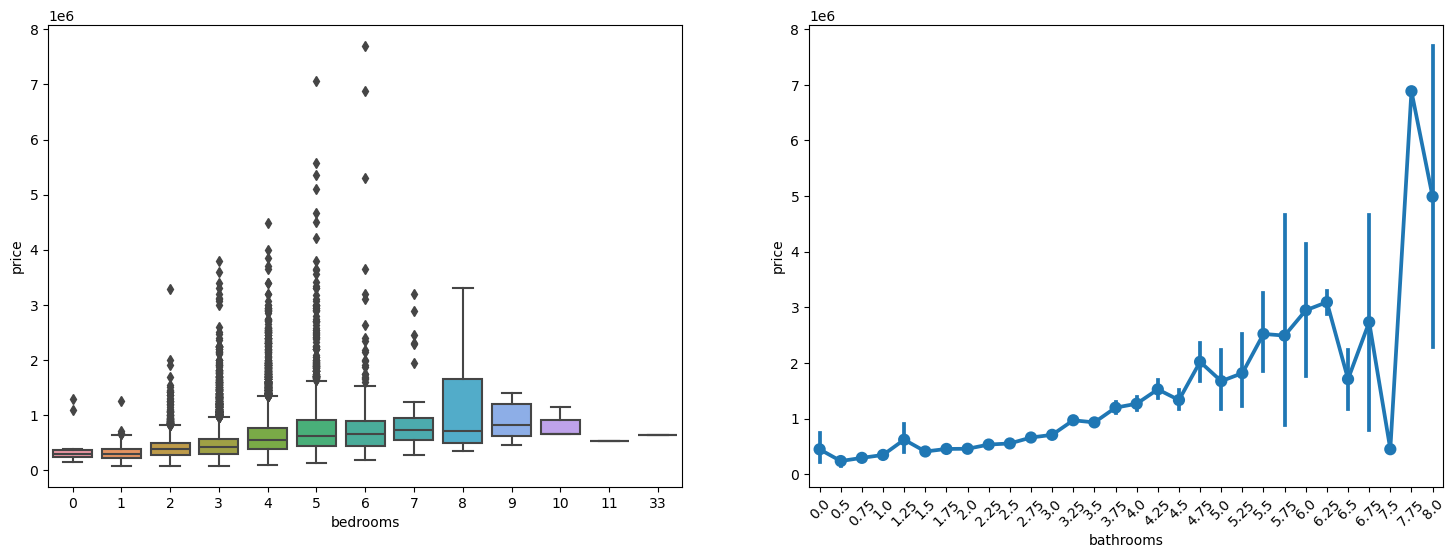

In [11]:
fig,ax = plt.subplots(ncols=2,figsize=(18,6))

sns.boxplot(x='bedrooms',y='price',data=df,ax=ax[0])
sns.pointplot(x='bathrooms',y='price',data=df,estimator=np.mean,ax=ax[1])

plt.xticks(rotation=45)
plt.show()

#### Insight

* Houses with higher number of bedrooms and bathrooms tend to have higher prices as well.

### House price based on living space and land space (square ft.)

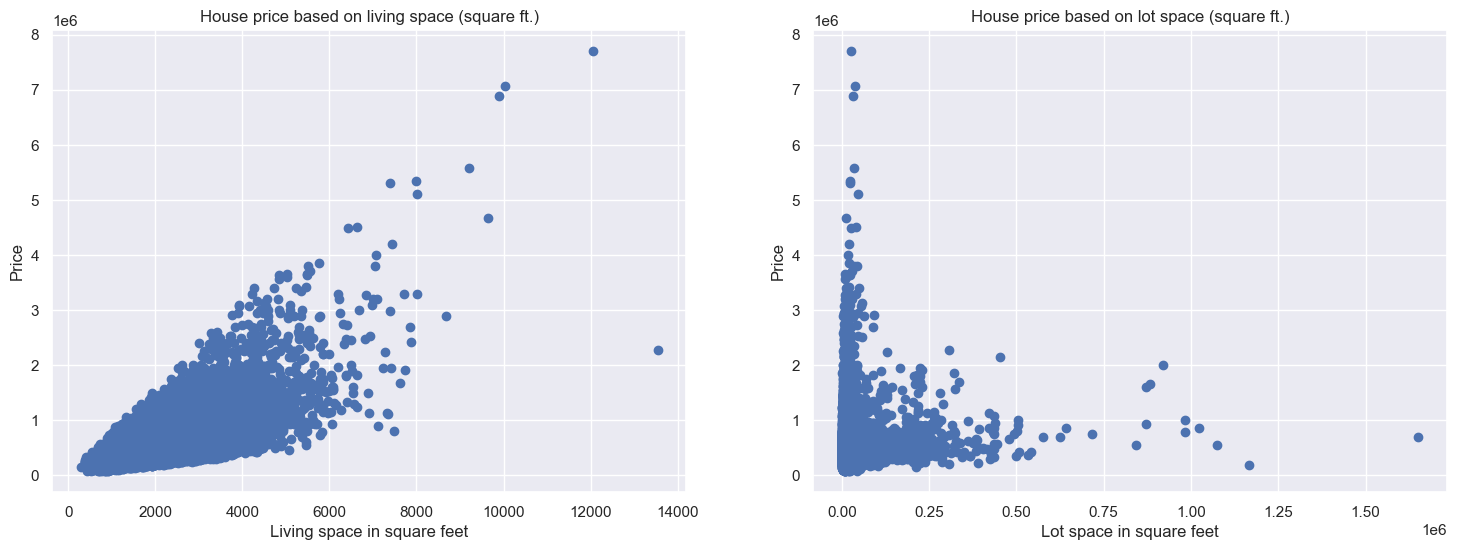

In [12]:
sns.set()

fig,ax = plt.subplots(ncols=2,figsize=(18,6))

ax[0].scatter(df['sqft_living'],df['price'])
ax[1].scatter(df['sqft_lot'],df['price'])

labels = [
    {
        'title': 'House price based on living space (square ft.)',
        'xlabel': 'Living space in square feet',
        'ylabel': 'Price'
    },
    {
        'title': 'House price based on lot space (square ft.)',
        'xlabel': 'Lot space in square feet',
        'ylabel': 'Price'
    }
]

for i in range(2):
    ax[i].set_title(labels[i]['title'])
    ax[i].set_xlabel(labels[i]['xlabel'])
    ax[i].set_ylabel(labels[i]['ylabel'])

plt.show()

#### Insight

* We can see that there is a linear relationship between the living space and house price.
* In terms of lot space and price, we cant see that much relationship between these two variables.

### House price based on the number of floors

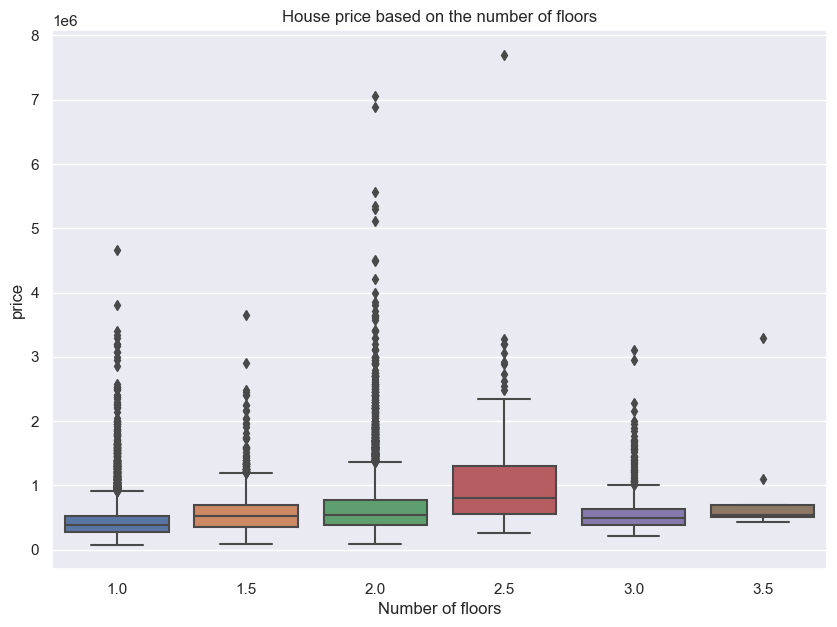

In [13]:
plt.figure(figsize=(10,7))

sns.boxplot(x='floors',y='price',data=df)
plt.title('House price based on the number of floors')
plt.xlabel('Number of floors')
plt.show()

#### Insight

* We can see that the number of floors affect the house price.

### House price based on view and condition

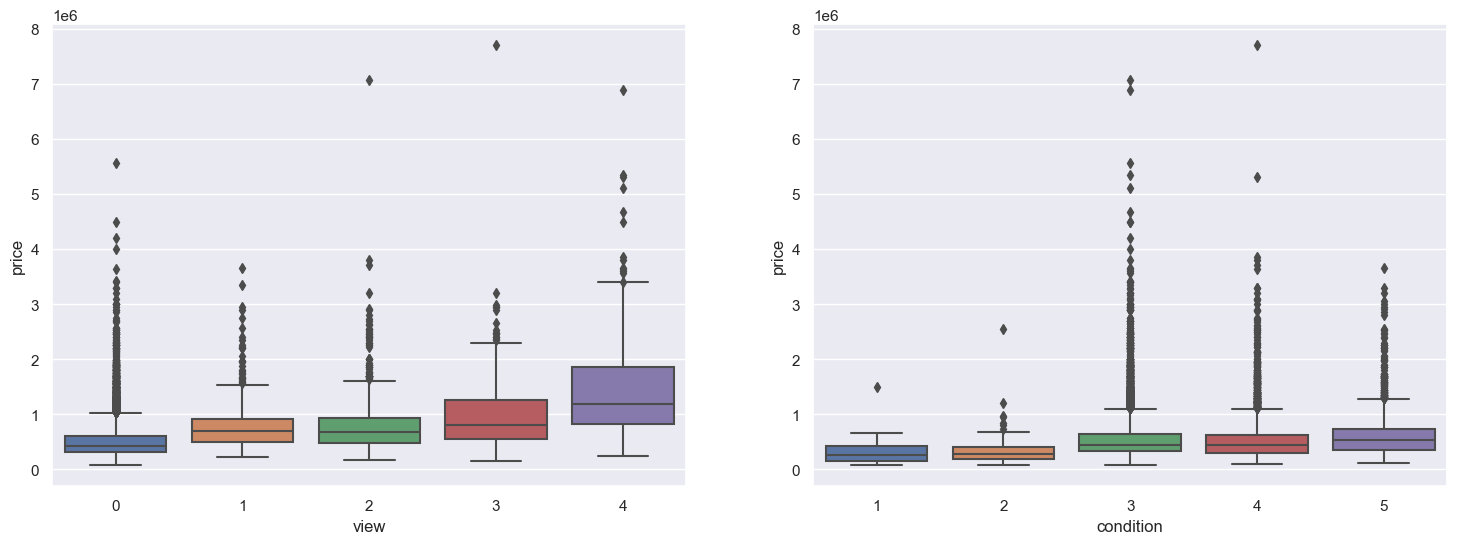

In [14]:
fig,ax = plt.subplots(ncols=2,figsize=(18,6))

sns.boxplot(x='view',y='price',data=df,ax=ax[0])
sns.boxplot(x='condition',y='price',data=df,ax=ax[1])

plt.show()

#### Insight

* We can see that the higher the rate for view and condition, the higher the price.

### House price based on grade

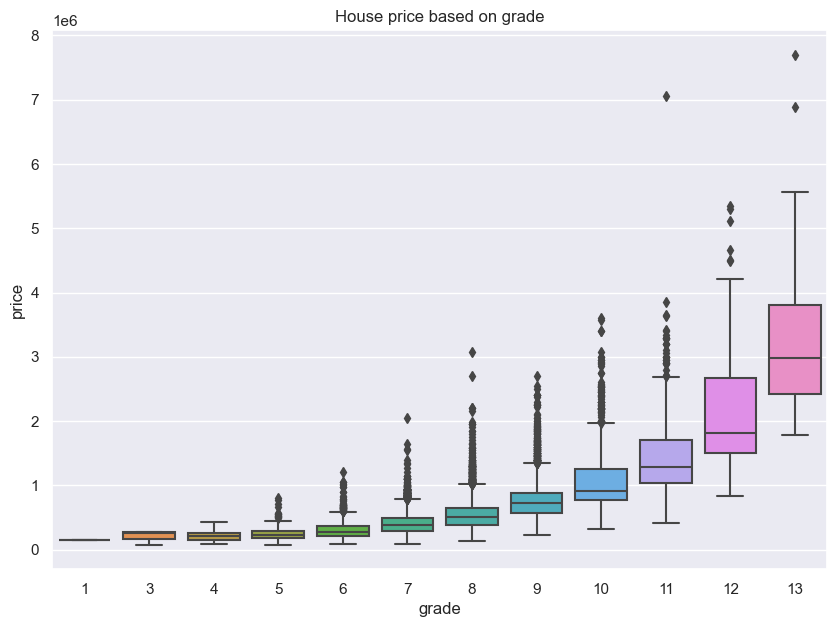

In [15]:
plt.figure(figsize=(10,7))
sns.boxplot(x='grade',y='price',data=df)

plt.title('House price based on grade')
plt.show()

#### Insight

* Just like the view and condition, higher grade gives higher price.

### House price based on year built and renovated

C:\Users\91639\AppData\Local\Temp\ipykernel_11692\529698495.py:3: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  year_built_resampled = year_built.resample('5A').mean()
C:\Users\91639\AppData\Local\Temp\ipykernel_11692\529698495.py:7: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  year_renovated_resampled = year_renovated.resample('5A').mean()


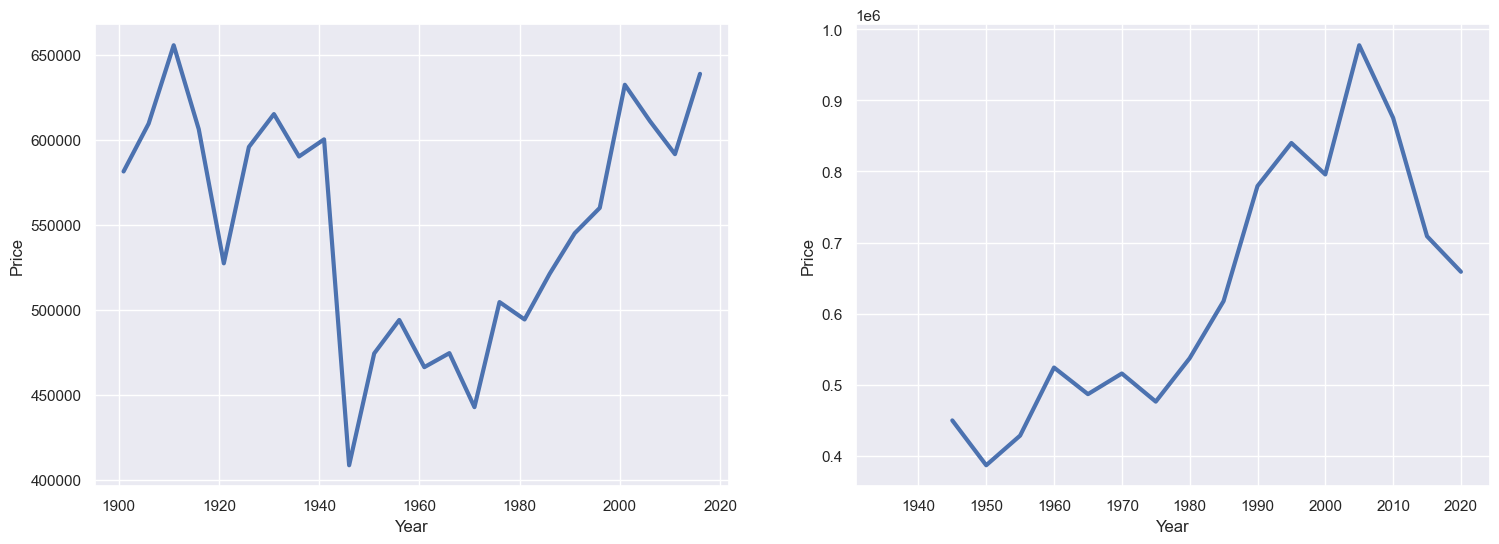

In [16]:
year_built = df.groupby('yr_built')['price'].mean()
year_built.index = pd.to_datetime(year_built.index, format='%Y')
year_built_resampled = year_built.resample('5A').mean()

year_renovated = df.groupby('yr_renovated')['price'].mean()[1:]
year_renovated.index = pd.to_datetime(year_renovated.index, format='%Y')
year_renovated_resampled = year_renovated.resample('5A').mean()

fig,ax = plt.subplots(ncols=2,figsize=(18,6))
ax[0].plot(year_built_resampled,lw=3)
ax[1].plot(year_renovated_resampled,lw=3)

for i in range(2):
    ax[i].set_xlabel('Year')
    ax[i].set_ylabel('Price')
plt.show()

#### Insight

* Newer houses tends to have higher prices.
* Houses that were renovated in later years also tends to have higher prices.

# Feature Selection

* Dropping unnecessary features

### Dropping unnecessary features

Following are the features that we will drop from the dataframe.

* id - IDs are not needed for training.
* date - The date in this particular dataset are only limited to 2014 and 2015 and will not likely to contribute to price.
* zipcode,sqft_living15,sqft_lot15 - these features are also not needed

In [17]:
df= df.drop(['id','date','zipcode','sqft_living15','sqft_lot15'],axis='columns')
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045


In [18]:
# Remove outliers
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['price'] >= Q1 - 1.5*IQR) & (df['price'] <= Q3 + 1.5*IQR)]

In [19]:
print('Shape after removing features and outliers:',df.shape)

Shape after removing features and outliers: (20467, 16)


# Model Building

* Importing necessary libraries
* Splitting the dataset into training and testing data
* Feature Scaling
* Creating ANN model
* Training the model
* Evaluating the model

### Splitting the dataset into training and testing data

In [20]:
X = df.drop('price',axis='columns')
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print('Length of training data:',len(X_train))
print('Length of testing data:',len(X_test))

Length of training data: 14326
Length of testing data: 6141


### Feature Scaling

* We will be using MinMaxScaler from sklearn library.
* This scales your data between 0 and 1.

In [21]:
scaler = MinMaxScaler()

# fit and transfrom
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Creating ANN model

In [22]:
model = Sequential()

# input layer
model.add(Input(shape=(15,)))

# hidden layers
model.add(Dense(20,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(20,activation='relu'))

# output layer
model.add(Dense(1,activation='linear'))

model.compile(optimizer='adam',loss='mse')

In [23]:
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

### Training the model

In [24]:
history = model.fit(x=X_train, y=y_train.values, 
                    validation_data=(X_test, y_test.values),
                    batch_size=256, epochs=400, 
                    callbacks=[early_stop], verbose=1)

Epoch 1/400
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 270933704704.0000 - val_loss: 270903001088.0000
Epoch 2/400
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 269957758976.0000 - val_loss: 265196814336.0000
Epoch 3/400
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 186142113792.0000 - val_loss: 29452634112.0000
Epoch 4/400
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 29086234624.0000 - val_loss: 27172276224.0000
Epoch 5/400
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 26988068864.0000 - val_loss: 26398420992.0000
Epoch 6/400
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 26274877440.0000 - val_loss: 25687701504.0000
Epoch 7/400
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 25548697600.0000 - val_loss: 24967723008.0000
Epoch 8/400
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 24831899648.0000 - val_loss: 24253452288.0000
Epoch 9/400
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 24102651904.0000 - val_loss: 23493459968.0000
Epoch 10/400
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/st

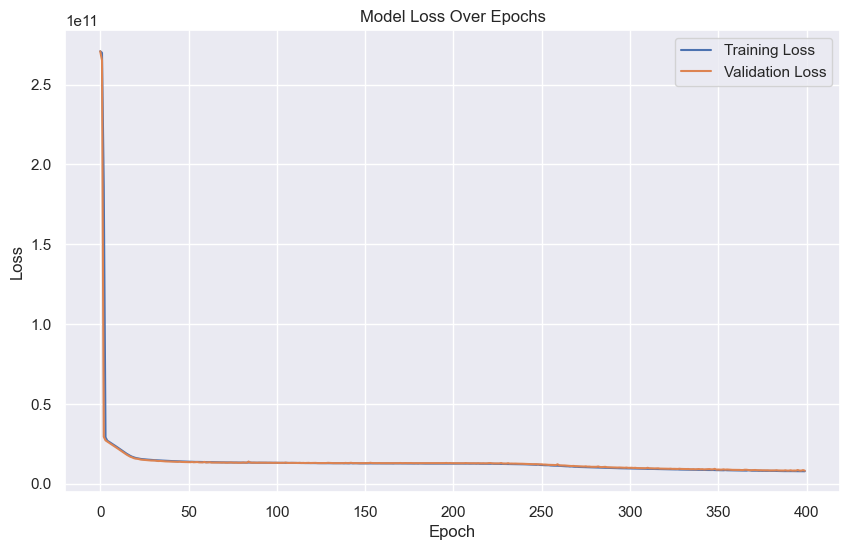

In [28]:
# Plot training history
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Evaluating the model

In [29]:
y_predicted = model.predict(X_test)
print('r2 score:',r2_score(y_test,y_predicted))

192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
r2 score: 0.8090020976500408


192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


C:\Users\91639\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


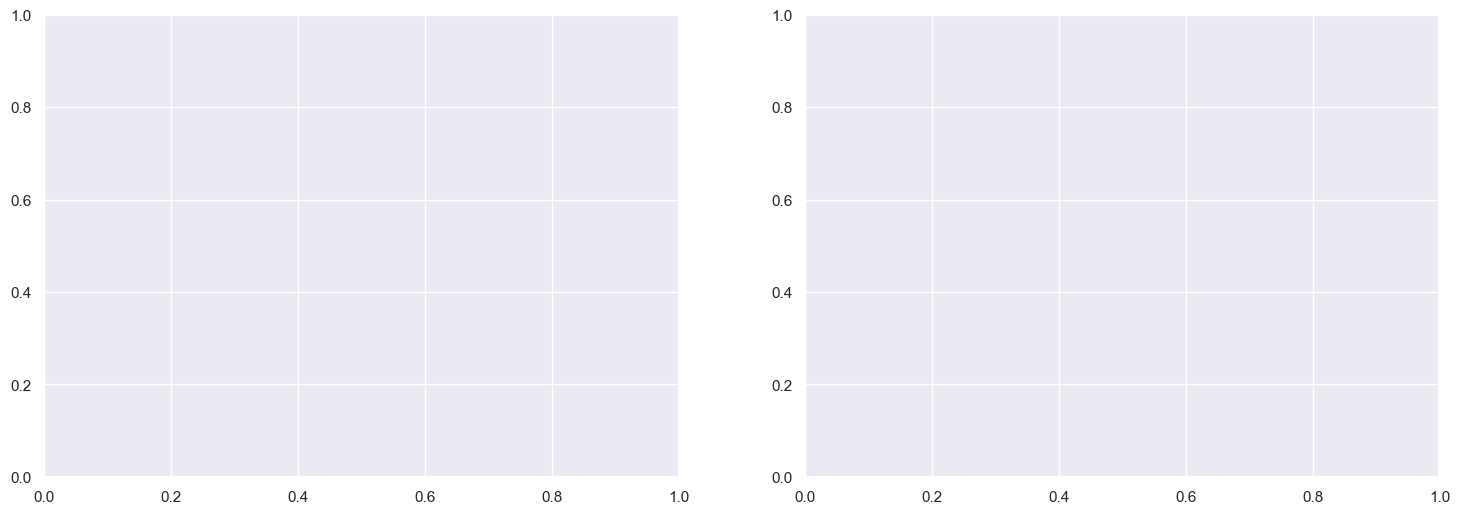

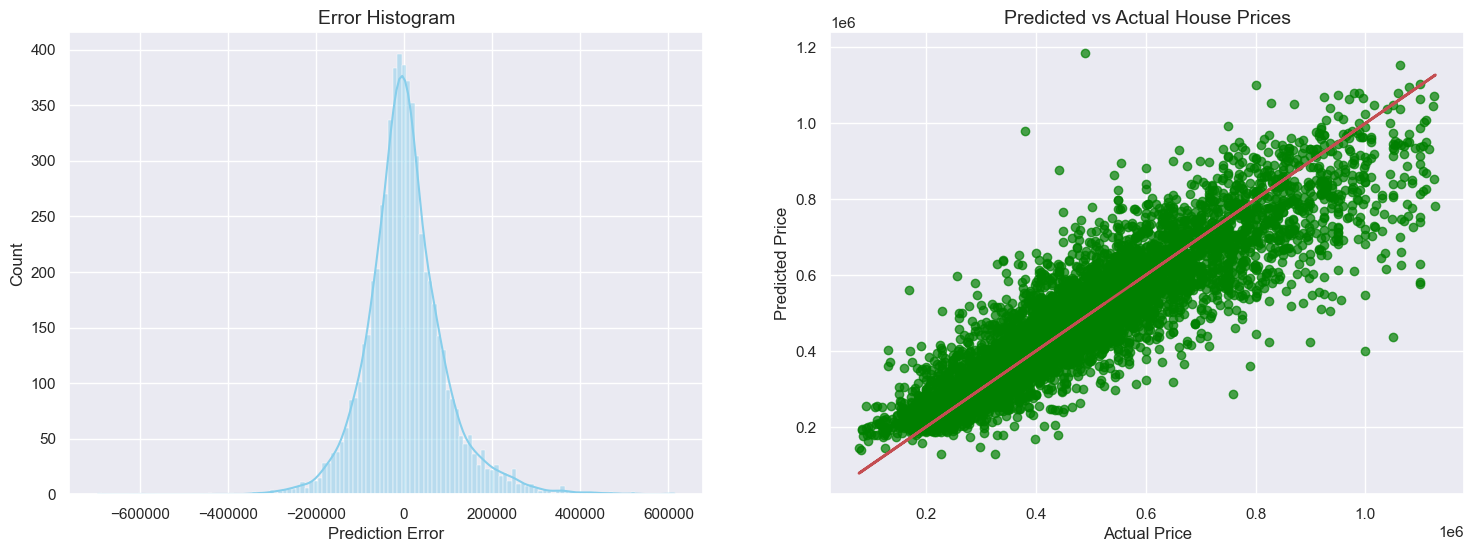

In [38]:
fig,ax = plt.subplots(ncols=2,figsize=(18,6))
y_predicted = loaded_model.predict(X_test).flatten()
y_test_values = y_test.values

# Calculate errors
errors = y_test_values - y_predicted

# Create subplots
fig, ax = plt.subplots(ncols=2, figsize=(18, 6))

# 1️⃣ Error distribution
sns.histplot(errors, ax=ax[0], kde=True, color='skyblue')
ax[0].set_title('Error Histogram', fontsize=14)
ax[0].set_xlabel('Prediction Error')

# 2️⃣ Predicted vs Actual scatter plot
ax[1].scatter(y_test_values, y_predicted, alpha=0.7, color='green')
ax[1].plot(y_test_values, y_test_values, 'r', lw=2)  # Perfect fit line
ax[1].set_title('Predicted vs Actual House Prices', fontsize=14)
ax[1].set_xlabel('Actual Price')
ax[1].set_ylabel('Predicted Price')

plt.show()

### Save the model

In [32]:
# Save the model and scaler
model.save('house_price_prediction_model.h5')
pickle.dump(scaler, open('scaler.pkl', 'wb'))

print('\nModel and scaler saved successfully!')


Model and scaler saved successfully!


### Load model and check r2 score

In [33]:
# Load model and scaler
from tensorflow.keras.losses import MeanSquaredError
loaded_model = tf.keras.models.load_model('house_price_prediction_model.h5', custom_objects={'mse': MeanSquaredError()})

loaded_model.compile(optimizer='adam', loss='mse')
loaded_scaler = pickle.load(open('scaler.pkl', 'rb'))

loaded_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 20)                  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 30)                  │             630 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 30)                  │             930 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 20)                  │             620 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 20)                  │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 30)                  │             630 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 30)                  │             930 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 20)                  │             620 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,121 (20.00 KB)

 Trainable params: 5,121 (20.00 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
loaded_model_y_predicted = loaded_model.predict(X_test)

# Evaluate
print('\n=== Model Performance ===')
print('R2 Score:', r2_score(y_test, loaded_model_y_predicted))
print('MAE:', mean_absolute_error(y_test, loaded_model_y_predicted))
print('RMSE:', np.sqrt(mean_squared_error(y_test, loaded_model_y_predicted)))

192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

=== Model Performance ===
R2 Score: 0.8090020976500408
MAE: 64200.035518187186
RMSE: 90668.42016504017


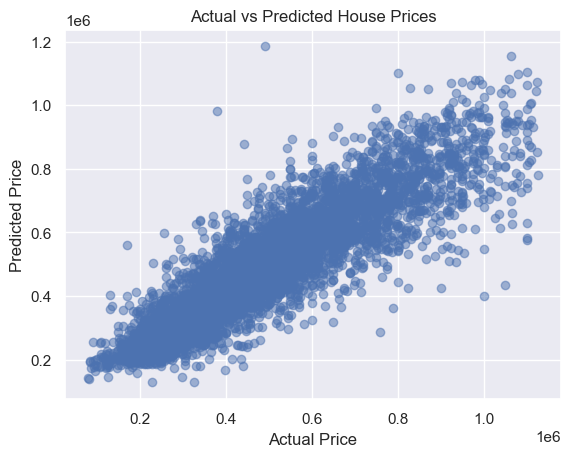

In [35]:
plt.scatter(y_test, loaded_model_y_predicted, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.show()


## Prediction For New Data

In [36]:
# Prediction function for new data
def predict_price(bedrooms, bathrooms, sqft_living, sqft_lot, floors, 
                  waterfront, view, condition, grade, sqft_above, 
                  sqft_basement, yr_built, yr_renovated, lat, long):
    """
    Predict house price based on features
    """
    new_data = np.array([[bedrooms, bathrooms, sqft_living, sqft_lot, floors,
                          waterfront, view, condition, grade, sqft_above,
                          sqft_basement, yr_built, yr_renovated, lat, long]])
    
    scaled_data = loaded_scaler.transform(new_data)
    predicted_price = loaded_model.predict(scaled_data)
    
    return predicted_price[0][0]

In [37]:
# Example prediction
example_price = predict_price(3, 2.5, 2000, 5000, 1, 0, 0, 3, 7, 1500, 500, 1990, 0, 47.5, -122.3)
print(f'\nExample prediction: ${example_price:,.2f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step

Example prediction: $356,820.94


C:\Users\91639\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
